In [3]:
import pandas as pd

df = pd.read_csv("Reviews.csv")
# Select the last 10,000 rows
df_last_10k = df.tail(10000)


In [4]:
df_last_10k.dropna()
#Removing the row with NAN value , there is only 1 row with profilename as NAN removing it
df_last_10k['Time']=pd.to_datetime(df_last_10k["Time"], unit='s')
df_last_10k.info(), df_last_10k.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 558454 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      10000 non-null  int64         
 1   ProductId               10000 non-null  object        
 2   UserId                  10000 non-null  object        
 3   ProfileName             9999 non-null   object        
 4   HelpfulnessNumerator    10000 non-null  int64         
 5   HelpfulnessDenominator  10000 non-null  int64         
 6   Score                   10000 non-null  int64         
 7   Time                    10000 non-null  datetime64[ns]
 8   Summary                 10000 non-null  object        
 9   Text                    10000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 781.4+ KB


C:\Users\arulm\AppData\Local\Temp\ipykernel_9892\3471319598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10k['Time']=pd.to_datetime(df_last_10k["Time"], unit='s')


(None,
             Id   ProductId          UserId                       ProfileName  \
 558454  558455  B00570T1W6  A3KU17ZOVU0E8I                    Ellen Caliendo   
 558455  558456  B00570T1W6  A3RYMO6S22FMM5  Vanessa Strange "porph princess"   
 558456  558457  B00570T1W6   AUDPAF8CB3DTR                      JF "mindful"   
 
         HelpfulnessNumerator  HelpfulnessDenominator  Score       Time  \
 558454                     0                       0      2 2011-06-21   
 558455                     0                       0      5 2011-04-14   
 558456                     1                       2      1 2012-03-13   
 
                                                   Summary  \
 558454                                         Pretty Bad   
 558455  Absolutely Delicious!  I am thrilled!  Great C...   
 558456                                      Deliver wrong   
 
                                                      Text  
 558454  I normally love these chips and buy them in t

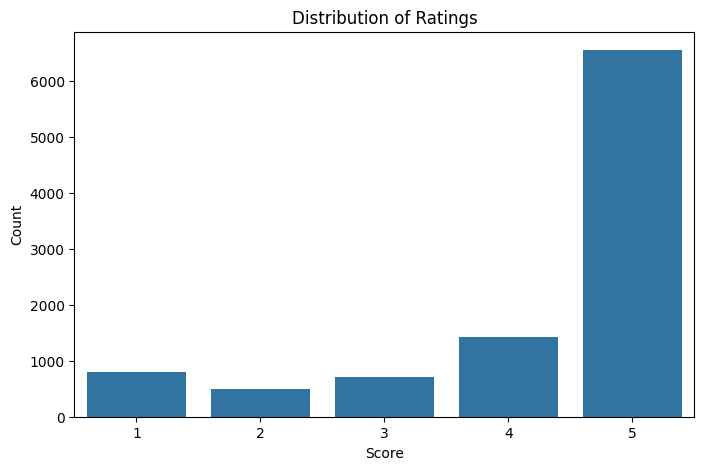

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df_last_10k, x=df_last_10k["Score"])
plt.title("Distribution of Ratings")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

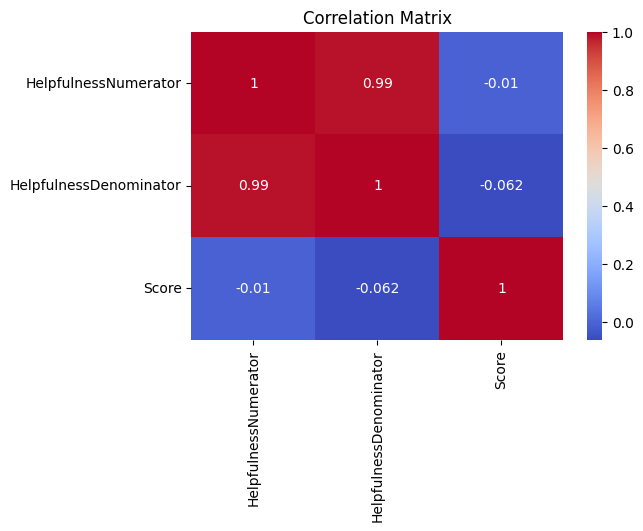

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df_last_10k[["HelpfulnessNumerator", "HelpfulnessDenominator", "Score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


C:\Users\arulm\AppData\Local\Temp\ipykernel_9892\27213717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10k["WordsCount"] = df_last_10k["Text"].apply(lambda x : len( str(x).split()))
C:\Users\arulm\AppData\Local\Temp\ipykernel_9892\27213717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10k["WordCountBucket"] = pd.cut(df_last_10k["WordsCount"], bins=[0, 10, 20, 30, 40, 50, 100], labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51+"])
C:\Users\arulm\AppData\Local\Temp\ipykernel

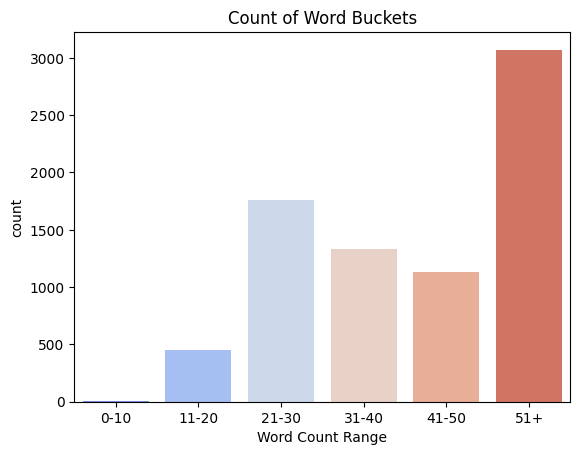

In [7]:
df_last_10k["WordsCount"] = df_last_10k["Text"].apply(lambda x : len( str(x).split()))
df_last_10k["WordCountBucket"] = pd.cut(df_last_10k["WordsCount"], bins=[0, 10, 20, 30, 40, 50, 100], labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51+"])
sns.countplot(x="WordCountBucket", data=df_last_10k, palette="coolwarm")
plt.title("Count of Word Buckets")
plt.xlabel("Word Count Range")
plt.show()

In [8]:
#Removing stop words as part of preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
df_last_10k["NormalizedText"]=df_last_10k["Text"].apply(lambda x : " ".join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arulm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\arulm\AppData\Local\Temp\ipykernel_9892\2580274543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10k["NormalizedText"]=df_last_10k["Text"].apply(lambda x : " ".join([word for word in x.split() if word not in stop_words]))


In [9]:
#Display POS TAG for first 2 rows of TEXT without preprocessing
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
df_last_10k['POS_Tags'] = df_last_10k['Text'].apply(lambda x: [nltk.pos_tag(word_tokenize(sent)) for sent in sent_tokenize(x)])
# Display the first 2 rows of the 'POS_Tags'
df_last_10k['POS_Tags'].head(2)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arulm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arulm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\arulm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\arulm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
C:\Users\arulm\AppData\Local\Temp\ipykernel_9892\2257140778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

558454    [[(I, PRP), (normally, RB), (love, VBP), (thes...
558455    [[(Boy, NNP), (,, ,), (I, PRP), (feel, VBP), (...
Name: POS_Tags, dtype: object

In [10]:
#DependencyParser

import random
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
long_sent = df_last_10k[df_last_10k["NormalizedText"].apply(lambda x : len(str(x).split())>=10)]["NormalizedText"].tolist()
random_sent = random.sample(long_sent ,2 )
docs = [nlp(sent) for sent in random_sent]
for doc in docs:
    displacy.render(doc, style="dep", jupyter=True, options={'compact': True, 'color': 'blue', 'bg': 'white'})


In [12]:
import stanfordnlp
import stanza
import numpy
from nltk import Tree

nlp2 = stanza.Pipeline("en", processors="tokenize,pos,constituency")
stanza.download("en")

def stanza_to_nltk_tree(stanza_tree):
    if isinstance(stanza_tree, str):
        return stanza_tree
    return Tree(stanza_tree.label, [stanza_to_nltk_tree(child) for child in stanza_tree.children])


def visualize_constituency_parse(doc):
    for sentence in doc.sentences:
        print("Constituency Parse Tree:")
        nltk_tree = stanza_to_nltk_tree(sentence.constituency)
        print(nltk_tree)
        nltk_tree.pretty_print()
        print("\n")
docs2 = [nlp2(sent) for sent in random_sent]
for doc in docs2:
    visualize_constituency_parse(doc)

2025-02-27 02:48:07 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-27 02:48:09 INFO: Downloaded file to C:\Users\arulm\stanza_resources\resources.json
2025-02-27 02:48:09 WARNING: Language en package default expects mwt, which has been added
2025-02-27 02:48:09 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

2025-02-27 02:48:09 INFO: Using device: cpu
2025-02-27 02:48:09 INFO: Loading: tokenize
2025-02-27 02:48:09 INFO: Loading: mwt
2025-02-27 02:48:10 INFO: Loading: pos
2025-02-27 02:48:12 INFO: Loading: constituency
2025-02-27 02:48:13 INFO: Done loading processors!


2025-02-27 02:48:14 INFO: Downloaded file to C:\Users\arulm\stanza_resources\resources.json
2025-02-27 02:48:14 INFO: Downloading default packages for language: en (English) ...
2025-02-27 02:48:15 INFO: File exists: C:\Users\arulm\stanza_resources\en\default.zip
2025-02-27 02:48:19 INFO: Finished downloading models and saved to C:\Users\arulm\stanza_resources


Constituency Parse Tree:
(ROOT
  (S
    (NP (DT (These )) (ADJP (JJ (chunky )) (RB (enough ))))
    (VP
      (VBP (keep ))
      (NP (NNS (things )))
      (S (ADJP (JJ (interesting ))))
      (PP
        (IN (without ))
        (S (VP (VBG (choking )) (NP (NN (hazard )))))))
    (. (. ))))
                               ROOT                                            
                                |                                               
                                S                                              
         _______________________|____________________________________________   
        |                                 VP                                 | 
        |                  _______________|_________________                 |  
        |                 |     |         |                 PP               | 
        |                 |     |         |          _______|_____           |  
        |                 |     |         |         |          